<a href="https://colab.research.google.com/github/angelgabriel1020/DataMiningLabs/blob/main/Lab4_GraphSpectra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this homework, the task was to implement and test the spectral graph clustering algorithm described in the paper "On Spectral Clustering: Analysis and an algorithm" by Andrew Y. Ng, Michael I. Jordan, and Yair Weiss. 

Also, we computed the eigenvectors and eigenvalues of the graphs to find out how many communities they have.

# Imports

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from scipy import linalg
from sklearn.cluster import KMeans
from matplotlib import cm

%config InlineBackend.figure_format = 'retina'

In [2]:
data_file1 = "example1.dat"
data_file2 = "example2.dat"

# The clustering algorithm

In [13]:
def load_graph(file_name, weights=False):
    """
    This function takes as input the path of a file containing a list of edges (and optionally weights)
    in a graph and outputs the graph in the form of a networkx class.

    :param file_name: path of the file representing the graph
    :param weight: indicates if the file contains weights or not

    :return: a nx.Graph instance representing the graph
    """

    if weights:
        return nx.read_weighted_edgelist(path=file_name, delimiter=',')
    else:
        return nx.read_edgelist(path=file_name, delimiter=',')


def spectral_clustering(graph, method="auto", k=2):
    """
    This function implements the algorithm described in “On Spectral Clustering: Analysis and an algorithm”
    by Andrew Y. Ng, Michael I. Jordan, Yair Weiss
    It computes k clusters in the graph provided as networkx graph with spectral clustering and returns an array
    with the label for each vertex and the adjacency matrix of the graph

    :param graph: networkx graph
    :param method: either "auto" or "manual"
    :param k: the number of clusters to be identified, not necesary if method="auto"

    :return: returns a numpy array of shape (number of vertices,) containing the label for each vertex,
                     the numpy adjacency matrix of shape (number of vertices, number of vertices) 
    """

    # Adjacency matrix
    A = nx.to_numpy_array(graph)
    D = np.diagflat(np.sum(A, axis=1))
    D_inv_squared = np.sqrt(np.linalg.inv(D))
    L = np.matmul(np.matmul(D_inv_squared, A), D_inv_squared)

    # Eigenvalues and associated vectors in ascending order
    eigenvalues, eigenvectors = linalg.eigh(L)
    # Eigenvalues in descending order
    eigenvalues = eigenvalues[::-1]

    # Automatically find how many communities the graphs has
    if method == "auto":
        k = np.argmin(np.ediff1d(eigenvalues)) + 1
        print(f"The estimated optimal number of clusters is: {k}.")

    X = eigenvectors[:, -k:]
    Y = X / np.linalg.norm(X, axis=1, keepdims=True)
    clusters = KMeans(n_clusters=k).fit(Y).labels_

    return clusters, A

# Real graph

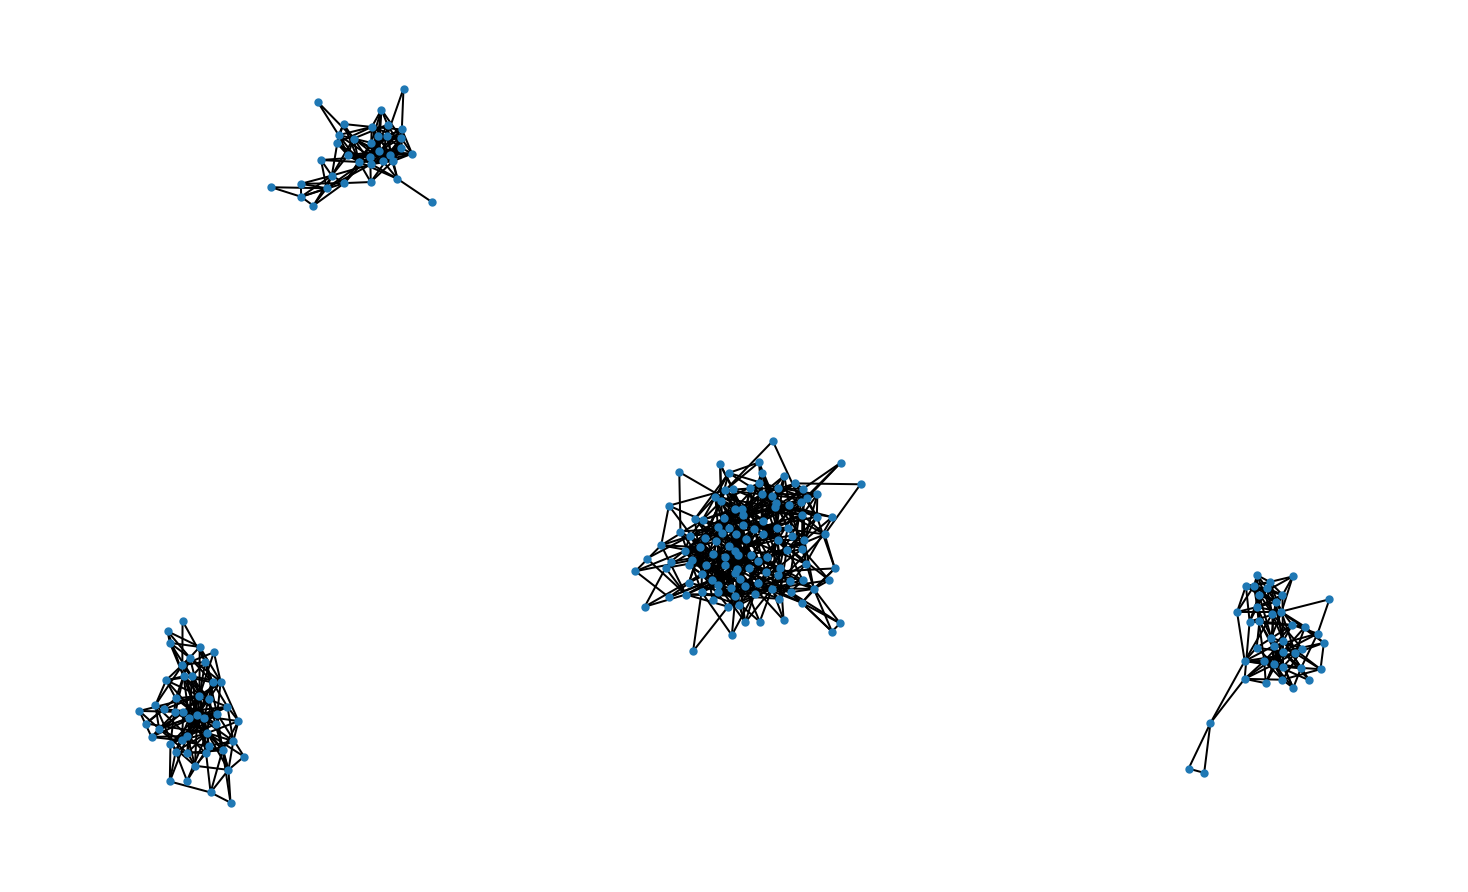

In [23]:
graph1 = load_graph(data_file1, weights=False)
plt.figure(figsize=(10,6))
nx.draw(graph1, node_size=10)

In [24]:
clusters, adjacency_matrix = spectral_clustering(graph1)

The estimated optimal number of clusters is: 4.


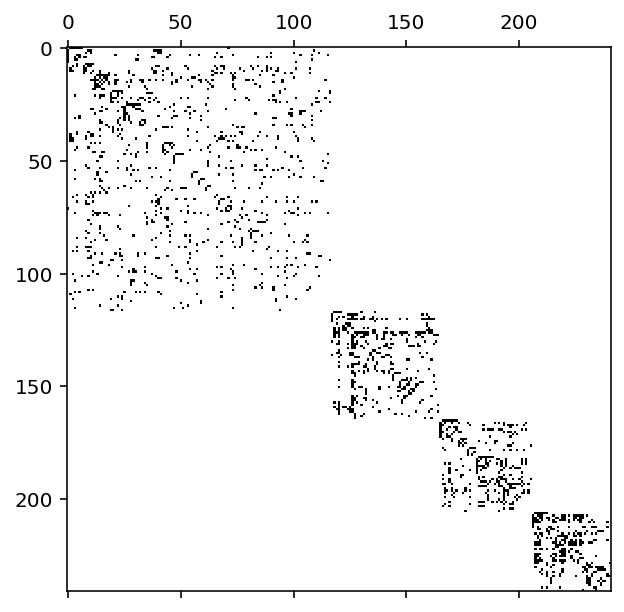

In [16]:
plt.figure(figsize=(5,5))
plt.spy(adjacency_matrix)

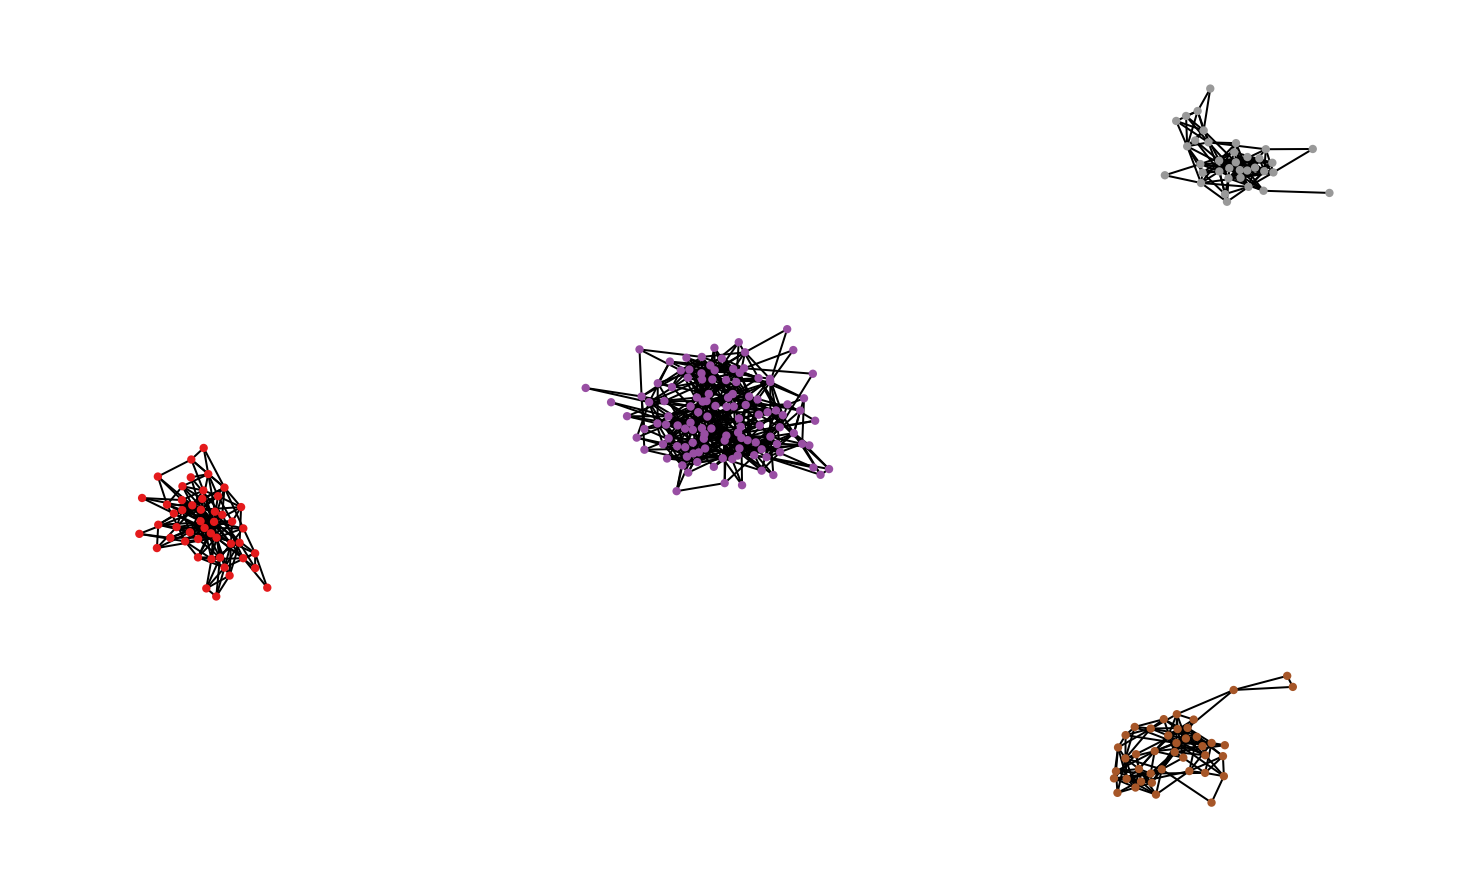

In [17]:
plt.figure(figsize=(10,6))
nx.draw(graph1, node_color=clusters, node_size=10, cmap=cm.get_cmap("Set1"))

# Synthetic graph

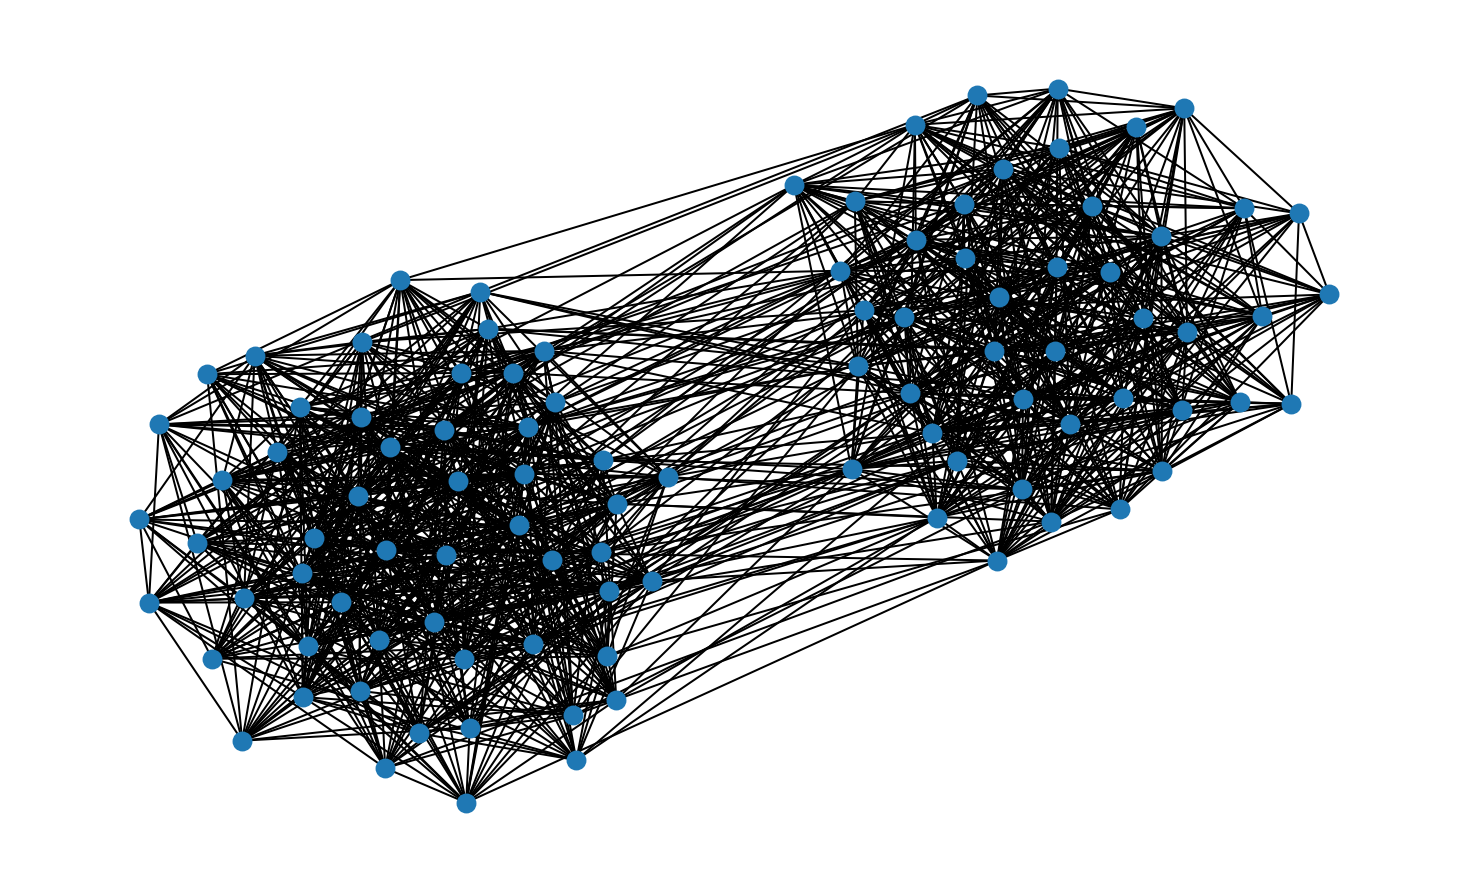

In [19]:
graph2 = load_graph(data_file2, weights=True)
plt.figure(figsize=(10,6))
nx.draw(graph2, node_size=80)

In [20]:
clusters2, adjacency_matrix2 = spectral_clustering(graph2)

The estimated optimal number of clusters is: 2.


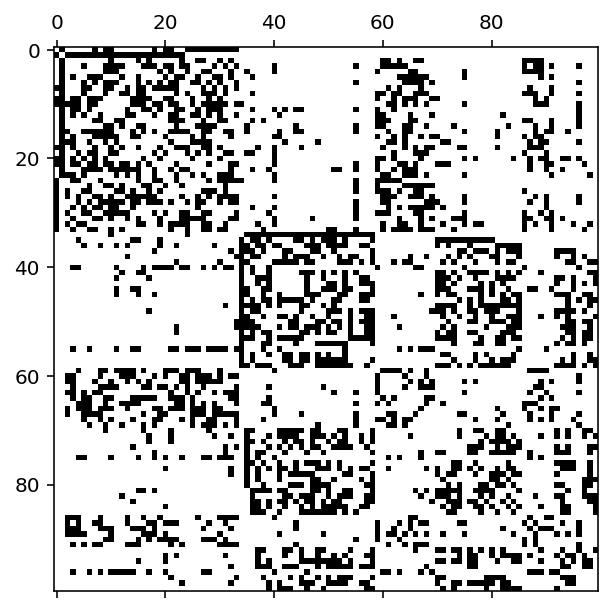

In [21]:
plt.figure(figsize=(5,5))
plt.spy(adjacency_matrix2)

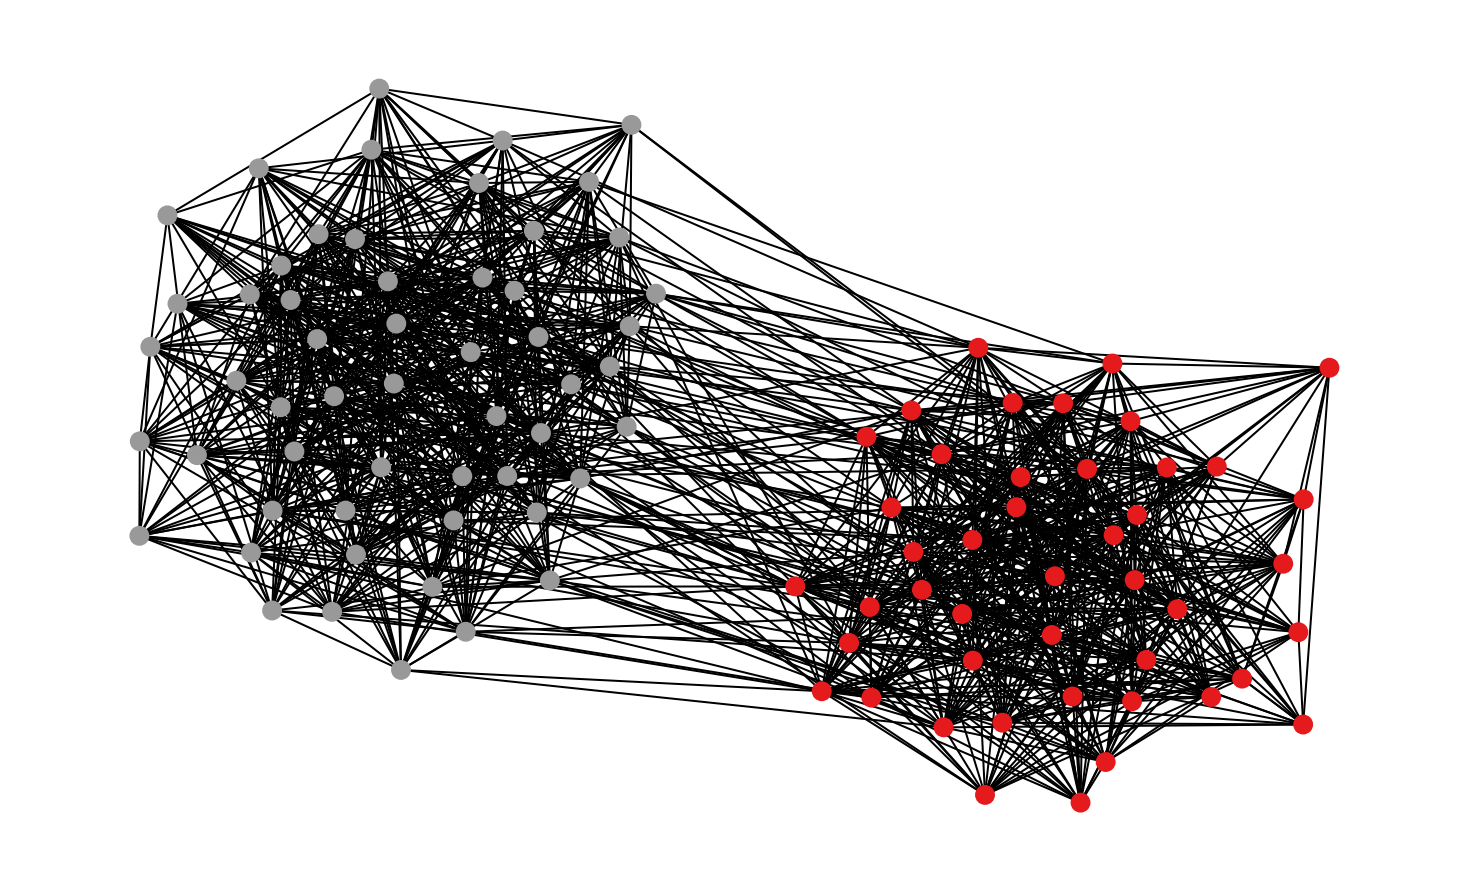

In [22]:
plt.figure(figsize=(10,6))
nx.draw(graph2, node_color=clusters2, cmap=cm.get_cmap("Set1"), node_size=80)